In [42]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

%matplotlib inline  

In [43]:
pi_true = np.array([0.35, 0.45, 0.2])
mu_true = np.array([-2,1,5])
sigma_true = np.array([0.9, 0.3, .7])

N = 30000
obs = np.zeros(N)

for i in range(N):
    z = np.random.random_sample()
    idx = 0
    tempSum = 0
    
    for j in range(np.size(pi_true)):
        if ((z > tempSum) & (z<=tempSum+pi_true[j])):
            idx = j
            break
        else:
            tempSum = tempSum + pi_true[j]
    
    v_temp = np.random.normal(mu_true[idx], sigma_true[idx], 1)
    obs[i] = v_temp;

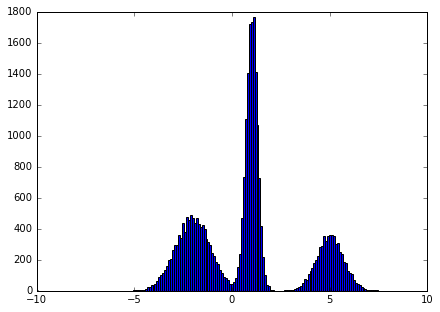

In [44]:
plt.figure(1, figsize=(7,5))
plt.hist(obs, bins=np.linspace(-10,10,(10-(-10))/0.1))
plt.show()

In [45]:
mu = np.mean(obs)
sigma = np.std(obs)
trial = 10
N = 10000
mus = np.zeros(trial)

for i in range(trial):
    cnt = 0
    importance_weight = 0
    sumP = 0
    sumQ = 0
    sumPQ = 0
    samples = np.zeros((N,2))
    mu_assumed = 0
    sigma_assumed = 10
    
    while cnt < N-1:
        idx = np.random.random_integers(3)-1
        sample = np.random.normal(mu_assumed,sigma_assumed, 1)
        q = multivariate_normal.pdf(sample, mu_assumed, sigma_assumed)
        p = pi_true[idx] * multivariate_normal.pdf(sample, mu_true[idx], sigma_true[idx])
        importance_weight = importance_weight + p/q + sample;
        sumPQ = sumPQ + p/q
        cnt = cnt + 1
        samples[cnt,0] = sample
        samples[cnt,1] = p/q
    
    mu_importancesampling = importance_weight / sumPQ
    mus[i] = mu_importancesampling
mu_trials = np.mean(mus)
std_trials = np.std(mus)

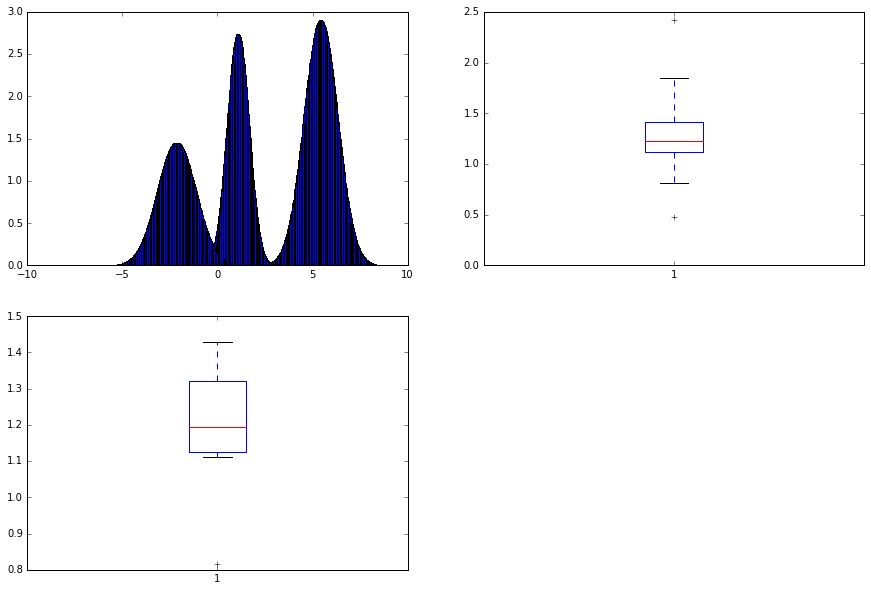

In [50]:
plt.figure(1, figsize = (15,10))
plt.subplot(2, 2, 1)
fig1 = plt.bar(samples[:,0], samples[:,1], width=0.1)
plt.xlim([-10, 10])

plt.subplot(2, 2, 2)
plt.boxplot(mus)

cnt = 0
mus_filtered = []
for i in range(trial):
    if (mus[i] <= mu_trials + std_trials) & (mus[i] >= mu_trials-std_trials):
        cnt = cnt + 1
        mus_filtered.append(mus[i])
mus_filtered = np.asarray(mus_filtered)

plt.subplot(2, 2, 3)
plt.boxplot(mus_filtered)
plt.show()

In [84]:
print('Mu from forward sampling : {0:.3f}.'.format(mu))
print('Mu from importance sampling: {0:.3f}.'.format(mu_trials))
print('Std from importance sampling: {0:.3f}.'.format(std_trials))
print('Lower bound of confidence interval from importance sampling: {0:.3f}'.format(mu_trials-1.96*std_trials/np.sqrt(trial)))
print('Upper bound of confidence intrval from importance sampling: {0:.3f}'.format(mu_trials+1.96*std_trials/np.sqrt(trial)))

print('Mu-Filtered from imprtance sampling: {0:.3f}.'.format(np.mean(mus_filtered)))
print('Std-filtered from importance sampling: {0:.3f}.'.format(np.std(mus_filtered)))
print('Lower bound of confidence interval from importance sampling-filtered: {0:.3f}.'.format(np.mean(mus_filtered)-1.96*np.std(mus_filtered)/np.sqrt(trial)))
print('Uppter bound of confidence interval from importance sampling-filtered: {0:.3f}.'.format(np.mean(mus_filtered)+1.96*np.std(mus_filtered)/np.sqrt(trial)))

Mu from forward sampling : 0.748.
Mu from importance sampling: 1.307.
Std from importance sampling: 0.505.
Lower bound of confidence interval from importance sampling: 0.994
Upper bound of confidence intrval from importance sampling: 1.620
Mu-Filtered from imprtance sampling: 1.190.
Std-filtered from importance sampling: 0.187.
Lower bound of confidence interval from importance sampling-filtered: 1.074.
Uppter bound of confidence interval from importance sampling-filtered: 1.306.
